# Исследование объявлений о продаже квартир

В вашем распоряжении данные архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Основная задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Основная задача проекта найти особенности и зависимости, которые существуют на рынке недвижимости.
Проанализируем данные, выполним их предварительную подготовку к анализу, избавимся от аномальных значений и добавим дополнительные параметры для дополнительного исследования.
Изучим, как быстро продавались квартиры, выявим факторы больше всего влияющие на общую (полную) стоимость объекта, построем графики зависимости цены от параметров. Рассчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. И вычислим среднюю цену каждого километра в Санкт-Петербурге.

### Ознакомление с данными

Импортируем библиотеки, прочтем файл с и сохраним его в переменной data.

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [200]:
data = pd.read_csv('/content/real_estate_data.csv', sep='\t')

In [201]:
data_init = data.copy()  # Сохраним датафрейм в переменную data_old

Выведем случайные пять строк и ознакомимся с таблицей.

In [202]:
data.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16971,15,5000000.0,35.8,2017-12-05T00:00:00,1,2.7,15.0,16.8,12,NaN,...,10.3,NaN,Санкт-Петербург,27583.0,12066.0,2.0,231.0,1.0,666.0,NaN
9725,0,2400000.0,36.0,2017-09-03T00:00:00,1,2.5,10.0,18.0,6,NaN,...,8.5,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,388.0
4458,7,4950000.0,40.1,2019-04-09T00:00:00,1,2.7,12.0,20.0,5,NaN,...,7.8,NaN,Санкт-Петербург,35564.0,11693.0,0.0,NaN,3.0,511.0,NaN
4785,8,4500000.0,63.0,2017-10-23T00:00:00,2,NaN,16.0,NaN,5,NaN,...,13.0,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,237.0
15167,10,2550000.0,29.7,2019-04-12T00:00:00,1,NaN,7.0,17.0,5,NaN,...,6.0,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [204]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


В таблице двадцать два столбца. Встречаются типы данных: int64, object, bool, float64.

Согласно документации к данным:

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

<i> Для корректного анализа необходимо будет изменить тип столбца first_day_exposition на DateTame, floors_total, days_exposition и balcony на int64, is_apartment на bool.</i>

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Построим гистогрпммы для числовых переменных датасета.

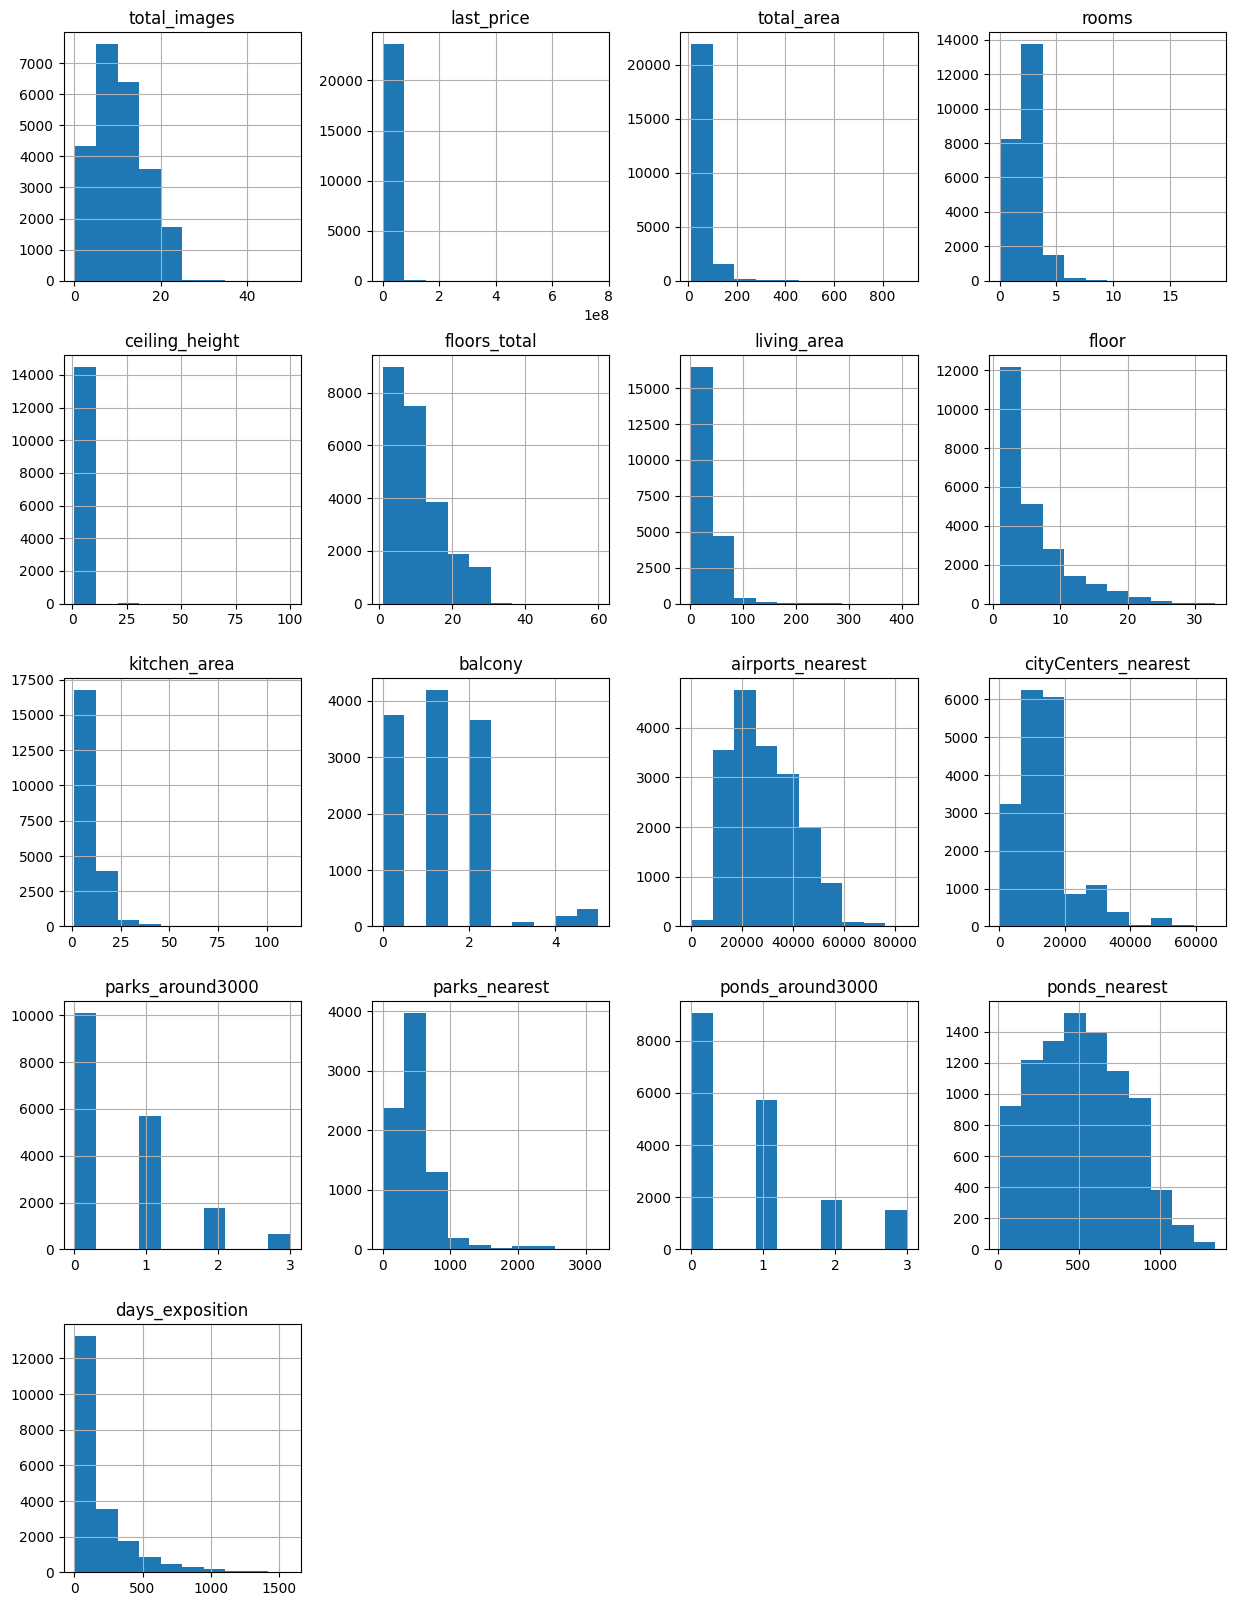

In [205]:
data.hist(figsize=(15, 20));

### Вывод

В нашем распоряжении данные 23699 объявлений о продаже квартир.   
В столбцах `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`,  `balcony`, `airports_neares`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` встречаются пропуски.  
Многие гистограммы сильно смещены в левую часть граафика (`total_images`, `last_price`, `total_area`, `living_area`, `kitchen_area`, `rooms`, `ceiling_height`, `floors_total`, `park_nearest`). Это свидетельствует о наличии в данных столбцах аномальных значений, сильно выбывающиеся на фоне остальных данных. Распределение граФиков похоже на нормальное, но при таком количестве аномальных значений и масштабе гистограмм утверждать это с уверенностью невозможно. Рассмотрим каждый из них по отдельности вдальнейшем.  
Для некоторых столбцов неверно присвоены типы данных.


### Предобработка данных

#### Проверка на дубликаты

Сразу убедимся, что отсутсвуют дубликаты.

In [206]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют.

#### Выявление пропущенных значений

Определим, в каких столбцах есть пропуски и подсчитаем их количество.

In [207]:
# Подсчет количества пропусков в каждом столбце
missing_values_count = data.isnull().sum()

# Подсчет процентного соотношения пропусков в каждом столбце
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Соединяем оба показателя в один DataFrame для удобства анализа
missing_values_analysis = pd.DataFrame({'Количество пропусков': missing_values_count,
                                        'Процент пропусков': missing_values_percentage})

missing_values_analysis[missing_values_analysis['Количество пропусков'] > 0]


,Количество пропусков,Процент пропусков
ceiling_height,9195,38.799105
floors_total,86,0.362885
living_area,1903,8.029875
is_apartment,20924,88.290645
kitchen_area,2278,9.612220
balcony,11519,48.605426
locality_name,49,0.206760
airports_nearest,5542,23.384953
cityCenters_nearest,5519,23.287902
parks_around3000,5518,23.283683


В исходных данных выявлено большое количество пропущенных значений.

<br> Данные столбцов `airports_nearest`(23%), `cityCenters_nearest`(23%),`parks_nearest`(66%), `ponds_nearest`(62%), `parks_around3000`(23%) и `ponds_around3000`(23%) вероятно, заполнялись автоматически на основе картографии. Причиной их возникновения могла стать ошибка при обработке, либо отсутсвие данной инфраструктуры в округе. Также, у некоторых столбцов количество пропусков совпадает.  
Причиной пропусков в столбцах `ceiling_height`(39%), `floors_total`(0,4%), `living_area`(8%), `kitchen_area`(10%) вероятнее всего, является человеческий фактор. Для их заполнения требуются дополнительные данные. Тем более, что данные графы не являются обязательными к заполнению.
<br> Пропуски в `locality_name`(0,2%), также могли возникнуть как из-за человеческого фактора. Например, из-за неверного заполнения поля.
<br> Пропуски в столбце `is_apartment`(88%) скорее всего возникли по причине незаполнения данной графы продавцами квартир. Примем их значение за False.
<br> Причиной пропусков в столбце `days_exposition`(13%), вероятно, является неснятие объявления на момент выгрузки данных.
<br> Пропуски в столбце `balcony`(49%), вероятно, говорят об его отсутствии.

#### Обработка пропусков

##### Обработка пропусков в столбцах 'locality_name' и 'floors_total'

In [208]:
total_nan_locality_floors = data[(data['locality_name'].isna()) | (data['floors_total'].isna())].shape[0]
f'Общее число пропусков в столбцах floors_total и locality_name - {total_nan_locality_floors} строки.'

'Общее число пропусков в столбцах floors_total и locality_name - 134 строки.'

Удалим данные строки, так как число пропусков составляет менее 1%, а достоверно восстановить данные не представляется возможным.

In [209]:
data = data.dropna(subset=['locality_name', 'floors_total']).reset_index(drop=True)

##### Обработка пропусков в столбце `is_apartment`

Данный стобец относится к булевому типу данных (bool). Поэтому, в соответствии с предположением, что данная графа не заполнялась продавцами квартир и ввиду отсутствия дополнительной информации об объектах, присвоим пропущенным данным значение False.

In [210]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

##### Обработка пропусков в столбцах `living_area` и `kitchen_area`.

Найдем коэффициент корреляции общей площади квартиры и общей жилой площади.

In [211]:
data['total_area'].corr(data['living_area'])

0.9397711143610333

Коэффициент корреляции равен 0,94, что говорит о сильной связи данных параметров. Так как пропуски в столбце `total_area` отсутствуют, добавим новый столбец в котором разобъем общую площадь на группы и заполним пропущенные значения `living_area` медианными значениями для каждой группы.

In [212]:
def categorize_total_area(area):
    try:
        if 0 <= area < 20:
            return 'A - under 20'
        elif 20 <= area < 30:
            return 'B - from 20 to 30'
        elif 30 <= area < 40:
            return 'C - from 30 to 40'
        elif 40 <= area < 50:
            return 'D - from 40 to 50'
        elif 50 <= area < 60:
            return 'E - from 50 to 60'
        elif 60 <= area < 80:
            return 'F - from 60 to 80'
        elif 80 <= area < 100:
            return 'G - from 80 to 100'
        elif 100 <= area < 120:
            return 'H - from 100 to 120'
        elif area >= 120:
            return 'I - above 120'
    except:
        pass

In [213]:
data['total_area_category'] = data['total_area'].apply(categorize_total_area)

In [214]:
value_to_fill_living_area = data.groupby('total_area_category')['living_area'].transform('median')

In [215]:
data['living_area'] = data['living_area'].fillna(value_to_fill_living_area)

Также, рассчитаем коэффициент корреляции общей площади и площади кухни.

In [216]:
data['total_area'].corr(data['kitchen_area'])

0.6092476784548315

В сравнении с ранее расчитанным, коэффициент корреляции значительно ниже, но связь данных все же существеная. Заполним пропущенные значения `kitchen_area` по аналогии со столбцом `living_area`.

In [217]:
for row in data['total_area_category'].unique():
    data.loc[(data['total_area_category'] == row) & (data['kitchen_area'].isna()),
             'kitchen_area'] = data.loc[(data['total_area_category'] == row), 'kitchen_area'].median()

##### Обработка пропусков в столбцах `balcony`,  `parks_around3000` и `ponds_around3000`

Отсутствующие данные в столбцах `balcony`,  `parks_around3000` и `ponds_around3000` примем за `0`, так как, вероятнее всего пользователь не стал указывать количество по причине их отсутствия.

In [218]:
data['balcony'] = data['balcony'].fillna(value='0')

In [219]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)

In [220]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

##### Обработка пропусков в столбце `ceiling_height`

В данном столбце отсутствует около 40% данных. Так как отсутствует дополнительная информация об объекте заполним данные пропуски медианными значениями в зависимости от общей площади. Однако, перед этим проверим значения, хранящиеся в данной колонке.

In [221]:
sorted(data['ceiling_height'].unique())

[1.0,
 2.0,
 2.3,
 2.4,
 2.45,
 2.46,
 2.48,
 2.53,
 2.59,
 2.62,
 2.63,
 2.7,
 nan,
 1.2,
 1.75,
 2.2,
 2.25,
 2.34,
 2.47,
 2.49,
 2.5,
 2.51,
 2.52,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.6,
 2.61,
 2.64,
 2.65,
 2.66,
 2.67,
 2.68,
 2.69,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,


<br>В данном столбце встречаются  маловероятные значения.
<br>Высота потолков с диапозоном от 20,0 до 32,0 метров, скорее всего является опечаткой, неверно указанной запятой. Изменим порядок этих значений.
<br>Потолки высотой до 2,0 метров кажутся неправдоподобными. Стандартная высота потолков составляет 2,5 м. Возможны отклонения в меньшую сторону из-за особенностей ремонта (натяжные или навесные потолки, подиумы). Рассмотрим данные значения отдельно.
<br>Также отдельно рассмотрим строки с высотой потолков от 8 до 14 метров.

In [222]:
data[(data['ceiling_height'] < 2.0)][['last_price', 'total_area', 'rooms', 'ceiling_height', 'floor', 'floors_total', 'locality_name', 'is_apartment']]

,last_price,total_area,rooms,ceiling_height,floor,floors_total,locality_name,is_apartment
5683,1500000.0,42.8,2,1.20,1,2.0,городской посёлок Мга,False
16837,4100000.0,40.0,1,1.75,5,37.0,Санкт-Петербург,False
22463,6000000.0,55.0,2,1.00,7,12.0,Санкт-Петербург,False


Допустим, что причиной появления этих значений также является опечатка. Изменим их на `2.2`, `2.75` и `2.00` соответственно.

In [223]:
wrong_ceiling_height = data.loc[:, 'ceiling_height'].isin([1.2, 1.75, 1.0])
data.loc[wrong_ceiling_height, 'ceiling_height'] = (data.loc[wrong_ceiling_height, 'ceiling_height']
                                                    .map({1.2:2.2, 1.75:2.75, 1.0:2.0}))

Изменим порядок аномально высоких потолков (`20.0` - `32.0` метров).

In [224]:
max_ceiling = 20
too_height_ceiling = data['ceiling_height'] >= max_ceiling
data.loc[too_height_ceiling, 'ceiling_height'] = (data.loc[too_height_ceiling, 'ceiling_height'] / 10).round(2)

Изучим строки с высотой потолков от 8 до 14 метров.

In [225]:
data[(data['ceiling_height'] > 5.0) & (data['ceiling_height'] <= 14.0)][['last_price', 'total_area', 'rooms', 'ceiling_height', 'floor', 'floors_total', 'locality_name', 'is_apartment']]

,last_price,total_area,rooms,ceiling_height,floor,floors_total,locality_name,is_apartment
461,66571000.0,280.3,6,5.2,7,8.0,Санкт-Петербург,False
1022,155000000.0,310.0,5,5.3,3,3.0,Санкт-Петербург,False
1383,59800000.0,399.0,5,5.6,6,6.0,Санкт-Петербург,False
3459,1400000.0,30.0,1,8.0,2,5.0,деревня Нурма,False
5833,5650000.0,45.0,1,8.3,14,16.0,Санкт-Петербург,False
7540,38000000.0,143.0,3,5.5,5,5.0,Санкт-Петербург,False
12557,3900000.0,50.0,1,5.3,5,5.0,Санкт-Петербург,False
14975,5600000.0,56.4,2,14.0,5,14.0,Санкт-Петербург,False
15656,5600000.0,67.0,3,8.0,1,16.0,Санкт-Петербург,False
17345,5350000.0,54.0,2,8.0,2,5.0,Красное Село,False


В данном случае сложно определить какую либо зависимость. Удалим строки с выбивающимися значениями.

In [226]:
data = data[(data['ceiling_height'].isna()) | (data['ceiling_height'] <= 5.0)]

<div class="alert alert-info">
Проверим количество удаленных значений на данном этапе.
</div>

In [227]:
print(f'Количество удаленных строк - {data_init.shape[0] - data.shape[0]}, что состаляет {((data_init.shape[0] - data.shape[0]) / data_init.shape[0]):.1%}')

Количество удаленных строк - 148, что состаляет 0.6%


Проверим оставшиеся уникальные значения столбца.

In [228]:
sorted(data['ceiling_height'].unique())

[2.0,
 2.2,
 2.25,
 2.26,
 2.49,
 2.63,
 2.68,
 2.69,
 2.7,
 nan,
 2.3,
 2.34,
 2.4,
 2.45,
 2.46,
 2.47,
 2.48,
 2.5,
 2.51,
 2.52,
 2.53,
 2.54,
 2.55,
 2.56,
 2.57,
 2.58,
 2.59,
 2.6,
 2.61,
 2.62,
 2.64,
 2.65,
 2.66,
 2.67,
 2.71,
 2.72,
 2.73,
 2.74,
 2.75,
 2.76,
 2.77,
 2.78,
 2.79,
 2.8,
 2.81,
 2.82,
 2.83,
 2.84,
 2.85,
 2.86,
 2.87,
 2.88,
 2.89,
 2.9,
 2.91,
 2.92,
 2.93,
 2.94,
 2.95,
 2.96,
 2.97,
 2.98,
 2.99,
 3.0,
 3.01,
 3.02,
 3.03,
 3.04,
 3.05,
 3.06,
 3.07,
 3.08,
 3.09,
 3.1,
 3.11,
 3.12,
 3.13,
 3.14,
 3.15,
 3.16,
 3.17,
 3.18,
 3.2,
 3.21,
 3.22,
 3.23,
 3.24,
 3.25,
 3.26,
 3.27,
 3.28,
 3.29,
 3.3,
 3.31,
 3.32,
 3.33,
 3.34,
 3.35,
 3.36,
 3.37,
 3.38,
 3.39,
 3.4,
 3.42,
 3.43,
 3.44,
 3.45,
 3.46,
 3.47,
 3.48,
 3.49,
 3.5,
 3.51,
 3.52,
 3.53,
 3.54,
 3.55,
 3.56,
 3.57,
 3.58,
 3.59,
 3.6,
 3.62,
 3.63,
 3.65,
 3.66,
 3.67,
 3.68,
 3.69,
 3.7,
 3.75,
 3.76,
 3.78,
 3.8,
 3.82,
 3.83,
 3.84,
 3.85,
 3.86,
 3.87,
 3.88,
 3.9,
 3.93,
 3.95,
 3.98,
 4.0,

После обработки выбивающихся значений заполним пропуски медианным значением данных, сгруппированных по `total_area_category`.

In [229]:
value_to_fill_ceiling_height = data.groupby('total_area_category')['ceiling_height'].transform('median')

In [230]:
data['ceiling_height'] = data['ceiling_height'].fillna(value_to_fill_ceiling_height)

<ipython-input-230-04aaa2b607be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'] = data['ceiling_height'].fillna(value_to_fill_ceiling_height)


##### Обработка пропусков в столбце `days_exposition`

Причиной возникновения пропусков было принято то, что на момент выгрузки базы данные объекты не были проданы, соответственно объявления не были сняты с публикации.
<br>Заполнить данный столбец медианным или средним значением будет некорректно,поэтому присвоим им значения-маркер `-1`.  
*При дальнейшем анализе данные значения будут исключены с помощью жестких условий (<, >).*

In [231]:
data['days_exposition'] = data['days_exposition'].fillna(-1)

<ipython-input-231-7c2681c6a608>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['days_exposition'] = data['days_exposition'].fillna(-1)


In [232]:
data['days_exposition'].isna().sum()

0

### Выводы

За основную причину порпусков приняли человеческий фактор. Невнималельность при заполнении отдельных граф, нежелание пользователя искать дополнительные данные, опечатки. В случае, если пропущенные значения составили менее 1% от общего числа объявлений данные строки были удалены.
<br>Пропуски в столбцах `living_area`, `kitchen_area`, `ceiling_height` были заполненны медианным значением данных, разбитых по группам в зависимости от общей площади жилья. При заполнении значений `ceiling_height` предварительно устранили выбивающиеся значения.
<br>Пропуски в столбцах `balcony`,  `parks_around3000` и `ponds_around3000` приняты за `0`, исходя из предположения, что пользователи не заполняли данные из-за их отсутствия.
<br>Той же логики придерживались и в случае со столбцом `is_apartment`. Пропуски были заменены на значения `False`, т.к. пользователи не указали обратное.
<br>Убедимся, что в столбцах не осталось попусков:

In [233]:
# Подсчет количества пропусков в каждом столбце
missing_values_count = data.isnull().sum()

# Подсчет процентного соотношения пропусков в каждом столбце
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Соединяем оба показателя в один DataFrame для удобства анализа
missing_values_analysis = pd.DataFrame({'Количество пропусков': missing_values_count,
                                        'Процент пропусков': missing_values_percentage})

missing_values_analysis[missing_values_analysis['Количество пропусков'] > 0]


,Количество пропусков,Процент пропусков
airports_nearest,5523,23.451233
cityCenters_nearest,5500,23.353573
parks_nearest,15530,65.941998
ponds_nearest,14524,61.670417


Возможность замены отсутсвующих значений в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_nearest` и `ponds_nearest` рассмотрим после устранения неявных дубликатов в столбце `locality_name`.

#### Устранение дубликатов

##### Устранение неявных дубликатов в столбце `locality_name`

Выведем уникальные значения столбца `locality_name`.

In [234]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Кроме названия населенного пункта в некоторых строках указывают его тип - деревня, поселок, и т.д. Такой способ записи может привести к возникновению неявных дубликатов.
<br>Изменим данный столбец, оставив только имя населенного пункта без указания его типа.

In [235]:
def change_location_name(location):
    city = location.split()
    city_name = []
    for name in city:
        if name[0].isupper():
            city_name.append(name)
    return ' '.join(city_name)

In [236]:
data['locality_name'] = data['locality_name'].apply(change_location_name)

Проверим столбец на наличие дубликатов после внесенных изменений.

In [237]:
sorted(data['locality_name'].unique())

['Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',
 'Калитино',

Неявных дубликатов не обнаружено.

При анализе недвижимость в крупных городах вместе с недвижимостью в поселках с населением в несколько тысяч человек может привести к сильному разбросу значений. Добавим дополнительный столбец `locality_type` чтобы отделить Санкт-Петербург и населенные пункты, входящие в его территорию от других.

In [238]:
data['locality_type'] = 'village'

city_name = ['Санкт-Петербург', 'Колпино', 'Пушкин', 'Петергоф', 'Красное Село', 'Ломоносов', 'Кронштадт', 'Сестрорецк', 'Павловск', 'Зеленогорск', 'Шушары', 'Парголово', 'Металлострой', 'Стрельна', 'Песочный', 'Понтонный', 'Левашово', 'Лисий Нос', 'Репино', 'Александровская', 'Белоостров', 'Молодежное', 'Солнечное', 'Комарово', 'Усть-Ижора', 'Саперный', 'Петро-Славянка', 'Тярлево', 'Смолячково', 'Ушково', 'Серово', 'Мурино']

fiter_spb = data['locality_name'].isin(city_name)

data.loc[fiter_spb, 'locality_type']  = 'city'

Скопируем и разделим датасет на две категории `city` и `village`.

In [239]:
data_city = data.query('locality_type == "city"').copy()
data_village = data.query('locality_type != "city"').copy()

##### Вывод:
Дубликаты в датафрейме отсутствуют.
Из столбца `locality_name` удалили наименования типа населенного пункта, оставив только имя для урощения работы с данными и устранения неявных дубликатов в столбце.

#### Обработка пропусков в столбцах `cityCenters_nearest` и `airports_nearest`

Оставим данные столбцы без изменений, так как они должны заполняться автоматически на основании данных о местоположении объекта. Рассчитывать медиану будет некорректно, в виду отсутствия дополнительной информации о расположении объекта.

#### Изменение типов данных

Как было отмечено ранее, для дальнейшего анализа необходимо изменить тип столбцов `first_day_exposition` на DateTame, `floors_total`, `days_exposition` и `balcony` на int64, `is_apartment` на bool.

##### Изменение типа данных столбца `first_day_exposition`

Для возможности анализа данных по столбцу `first_day_exposition` изменим тип данных столбца.

In [240]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

##### Изменение типа данных столбцов `floors_total`, `days_exposition` , `balcony` и `is_apartment`

В столбцах `floors_total`, `days_exposition` и `balcony` могут быть только целые значения. Значения типа float64 могут исказить результаты при дальнейшем анализе. Изменим их тип на int.
<br>В столбце `is_apartment` хранится булевое значение, чтобы избежать возможных ошибок изменим тип на bool.

<div class="alert alert-info">
Изменим тип данных для столбцов `last_price`, `parks_around3000` и `ponds_around3000` к типу `int`. Данные столбцы также содержат целочисленные значения.
</div>

In [241]:
data.astype({'floors_total': 'int', 'last_price': 'int', 'parks_around3000': 'int', 'ponds_around3000': 'int',  'balcony': 'int', 'is_apartment': 'bool'}).dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                float64
total_area_category             object
locality_type                   object
dtype: object

##### Вывод:
Для упрощения операций со столбцами и предотвращения возникновения ошибок изменили форматы столбцов на более подходящие.

#### Выявление аномалий в данных

 Выведем список характерных значений по каждому столбцу.

In [242]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23551.000000,2.355100e+04,23551.000000,23551.000000,23551.000000,23551.000000,23551.000000,23551.000000,23551.000000,18028.000000,18051.000000,23551.000000,8021.000000,23551.000000,9027.000000,23551.000000
mean,9.876693,6.522955e+06,60.283812,2.070400,2.702061,10.677296,34.536356,5.878137,10.425740,28799.710062,14196.268572,0.468345,490.696422,0.589614,518.401684,156.244958
std,5.679127,1.083170e+07,35.517659,1.077965,0.227732,6.595525,21.725550,4.871984,5.694376,12635.371286,8613.686638,0.747825,341.696005,0.883792,278.043998,213.594453
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,-1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.700000,2.000000,7.100000,18557.000000,9239.500000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.636000e+06,52.000000,2.000000,2.600000,9.000000,30.000000,4.000000,9.000000,26757.500000,13101.000000,0.000000,455.000000,0.000000,503.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.750000,16.000000,42.000000,8.000000,11.800000,37278.750000,16289.000000,1.000000,612.000000,1.000000,730.500000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,5.000000,60.000000,409.700000,33.000000,112.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


При первом рассмотрении данные в столбцах `last_price`, `total_area`, `rooms`, `floors_total`, `living_area`, `kitchen_area`, `airports_nearest` имеют аномальные значения. Сильный разброс с стоимости жилья, общей площади, количества комнат, площади жилья и кухни. Макстмальное колтчество этажей выглядит неправдопообно, а `0` в столбце `airports_nearest` указывает на неверно заполненные данные.

<br>Для начала проанализирует стоимость объектов и откинем выбивающиеся. Рассмотрим общую площадь жилья, отфильтруем выбопросы и после проанализируем оставшиеся площадные столбцы.

##### Аномалии в столбце `last_price`

Рассмотрим данные в столбце `last_price`. Выведем список характерных значений и построим график цен.

In [243]:
data['last_price'].describe()

count    2.355100e+04
mean     6.522955e+06
std      1.083170e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.636000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

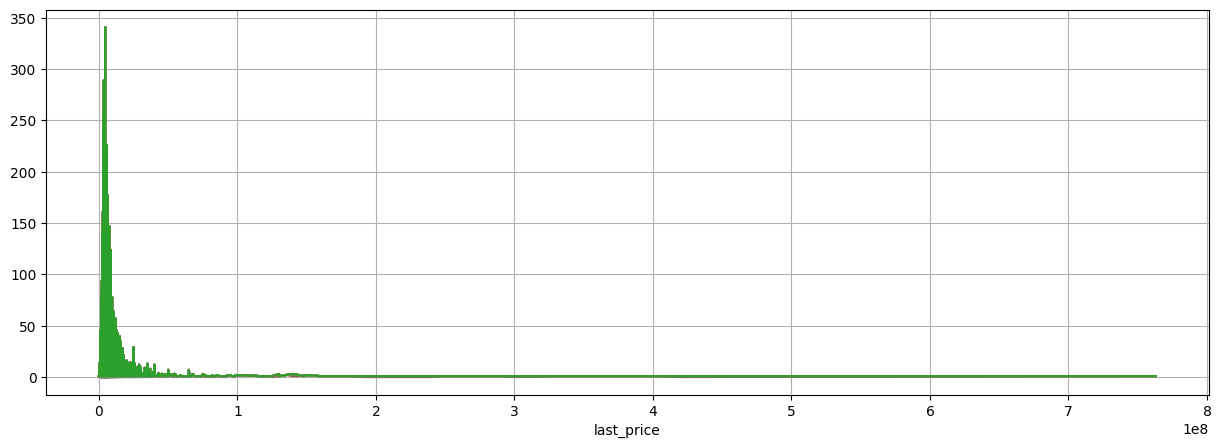

In [244]:
data.pivot_table(index='last_price', aggfunc='count').plot(grid=True, figsize=(15, 5), legend=False);

Отсортируем значения в порядке убывания и выведем пять первых и последних строк.

In [245]:
data[['last_price', 'total_area', 'rooms', 'living_area', 'locality_name']].sort_values(by='last_price', ascending=False).head(5)

,last_price,total_area,rooms,living_area,locality_name
12897,763000000.0,400.0,7,250.0,Санкт-Петербург
19431,420000000.0,900.0,12,409.7,Санкт-Петербург
14621,401300000.0,401.0,5,204.0,Санкт-Петербург
1431,330000000.0,190.0,3,95.0,Санкт-Петербург
15565,300000000.0,618.0,7,258.0,Санкт-Петербург


In [246]:
data[['last_price', 'total_area', 'rooms', 'living_area', 'locality_name']].sort_values(by='last_price', ascending=True).head(5)

,last_price,total_area,rooms,living_area,locality_name
8750,12190.0,109.0,2,32.0,Санкт-Петербург
14825,430000.0,54.0,2,31.5,Свирь
17359,430000.0,30.4,1,16.0,Сланцы
16185,440000.0,40.0,1,26.8,Старополье
17577,450000.0,36.5,1,17.3,Ям-Тесово


Стандартное отклонение на порядок больше среднего арифметического, что говорит о наличии выбросов в данных. Минимальная и максимальная цены очень отличаются (12190 руб. против 763000000 руб.). При этом цена 12190 руб. за квартиру 109 кв.м в Санкт-Петербурге выглядит неправдоподобно низкой и скорее похоже на опечатку. В данных встречаются аномально дорогие объекты Санкт-Петербурга с большой общей площадью, и объекты в небольших населенных пунктах со стоимостью менее 1 млн. рублей.

Отбросим объекты с ценой, выходящие за пределы квартилей (Q1 и Q3) - более 15 млн.руб. и менее 1 млн.руб.

In [247]:
data_normal_prices = data.query('1000000 <= last_price <= 15000000')

<Axes: xlabel='last_price'>

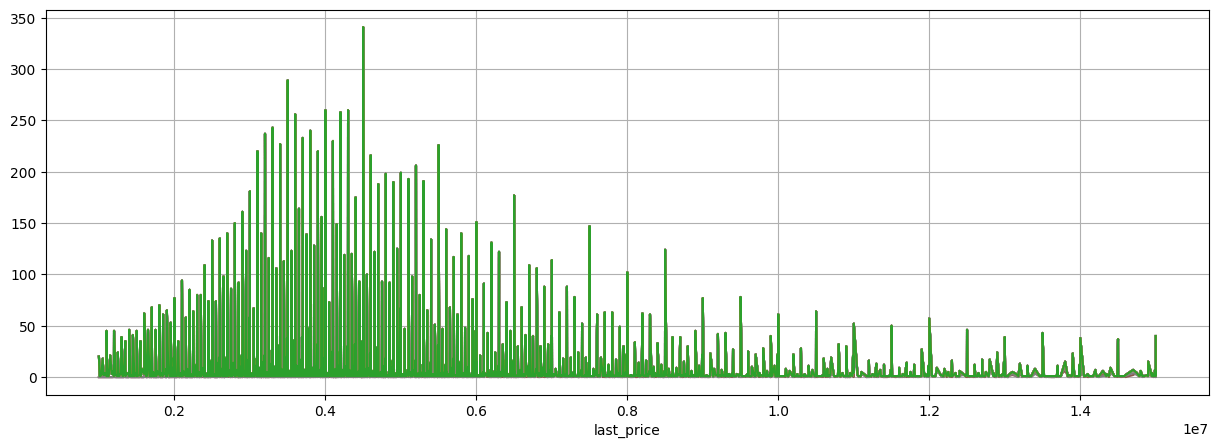

In [248]:
data_normal_prices.pivot_table(index='last_price', aggfunc='count').plot(grid=True, figsize=(15, 5), legend=False)

По отфильтрованным данным график выглядит более наглядно.

##### Аномалии в столбце `total_area`

Рассмотрим данные в столбце `total_area`. Выведем список характерных значений и построим.

In [249]:
data_normal_prices['total_area'].describe()

count    22136.000000
mean        55.330041
std         21.972051
min         12.000000
25%         39.600000
50%         50.400000
75%         66.000000
max        320.000000
Name: total_area, dtype: float64

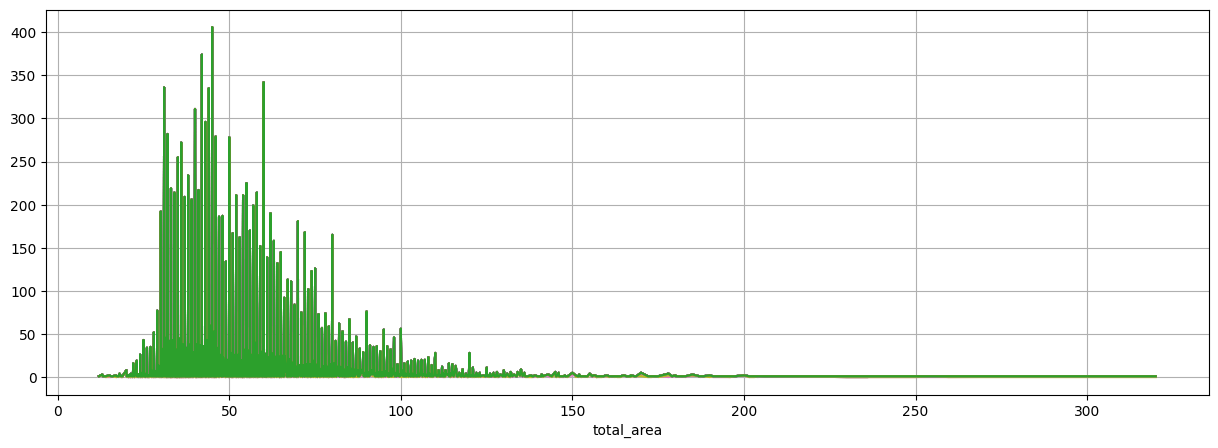

In [250]:
data_normal_prices.pivot_table(index='total_area', aggfunc='count').plot(grid=True, figsize=(15, 5), legend=False);

В столбце также встречаются значения, выбивающиеся из общих данных. Исключим из анализа значения до 30 кв.м. и свыше 130 кв.м. и построим гистограмму.

In [251]:
data_normal_prices = data_normal_prices.query('30 <= total_area <= 130')

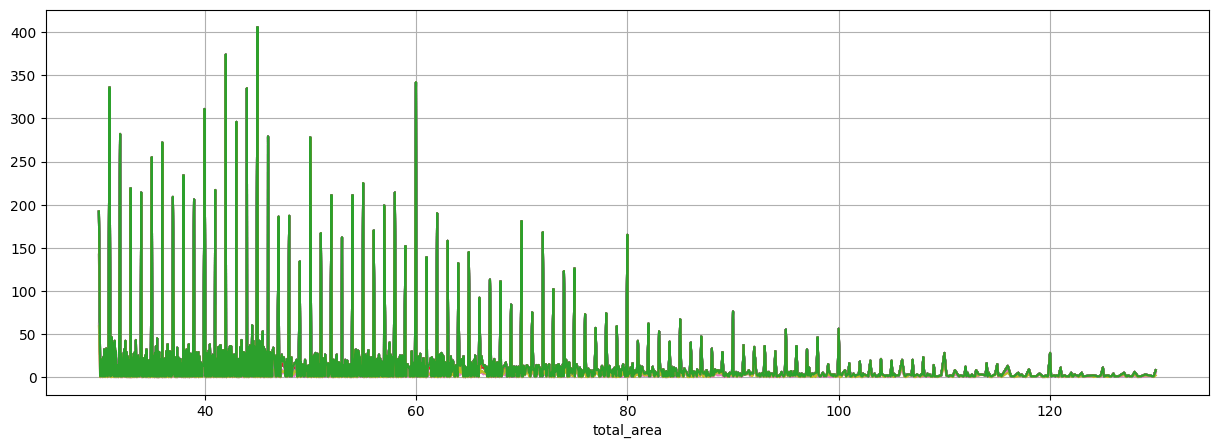

In [252]:
data_normal_prices.pivot_table(index='total_area', aggfunc='count').plot(grid=True, figsize=(15, 5), legend=False);

На графике присутствуют провалы. В данном случае не считаю необходимым их корректировать, так как это может быть связано с типовой планировкой квартир. Напрмер квартиры с площадью 45 кв.м. могут встречаться чаще, чем площадью 49.

##### Аномалии в столбце `rooms`

Для анализа значений в столбце `rooms` построим гистограмму по этому столбцу.

In [253]:
data_normal_prices['rooms'].describe()

count    21289.000000
mean         1.996242
std          0.905890
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

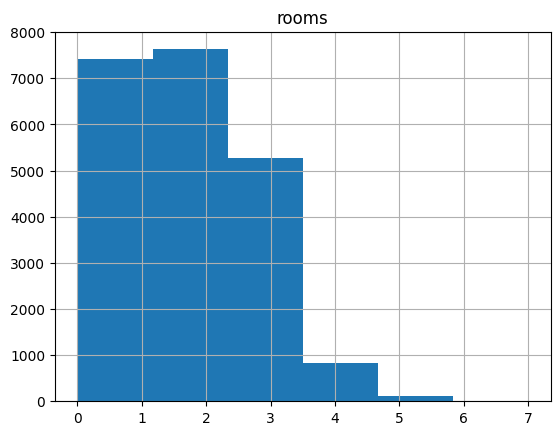

In [254]:
data_normal_prices[['rooms']].hist(bins=6);

В объявлениях встречаются студии (0 комнат), одно-, двух-, трех-, четырех-, пяти-, шести- и семикомнатные квартиры. Наибольшее число объектов имеют одну или две комнаты. Отфильтруем редкие объявления с шестью и семью комнатами.

In [255]:
data_normal_prices = data_normal_prices.query('rooms < 6')

##### Аномалии в столбце `floors_total`

array([[<Axes: title={'center': 'floors_total'}>]], dtype=object)

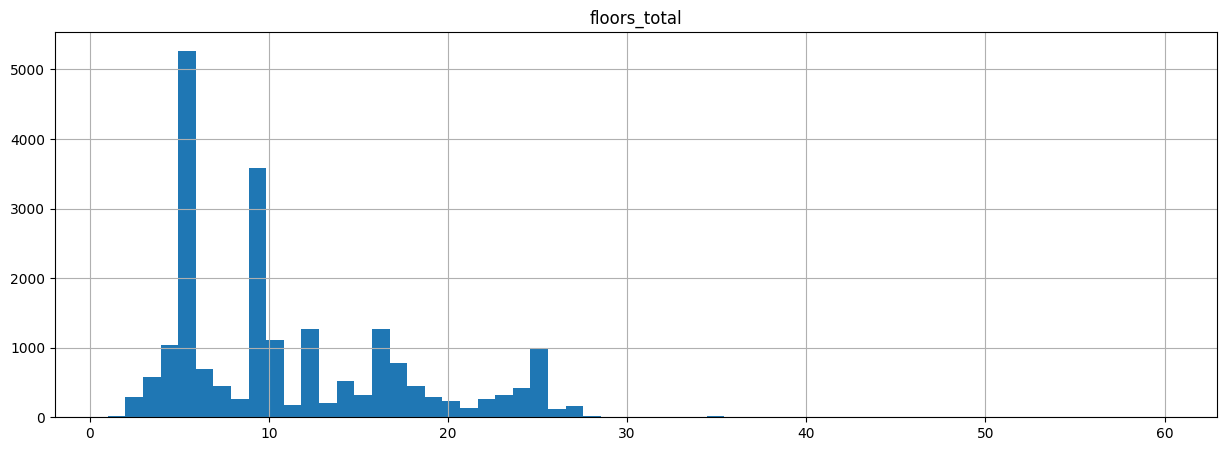

In [256]:
data_normal_prices[['floors_total']].hist(bins=60, figsize=(15, 5))

Максимальная высота здания в Санкт-Петербурге составляет 37 этажей (жилой комплекс «Князь Александр Невский»). Удалим данные, превышающие это значение.

In [257]:
data_normal_prices = data_normal_prices.query('floors_total < 37')

##### Аномалии в столбце `floor`

Построим гистограмму для столбца `floor`.

In [258]:
data_normal_prices['floor'].describe()

count    21271.000000
mean         5.893893
std          4.877953
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

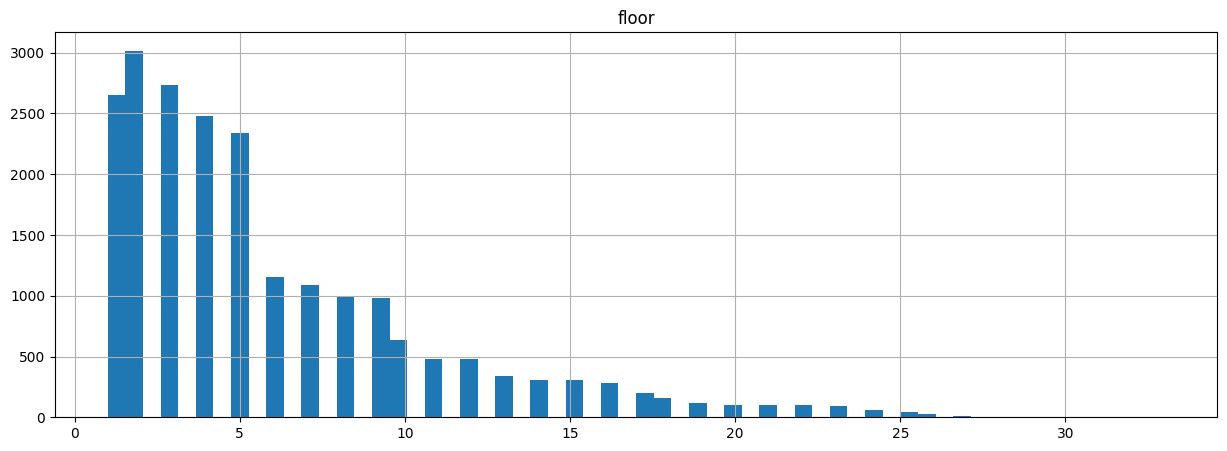

In [259]:
data_normal_prices[['floor']].hist(bins=60, figsize=(15, 5));

Половина объектов расположены менее, чем на 4м этаже. Наиболее часто встречаются объекты на 2м этаже. Минимальный этаж - 1й, максимальный - 33й. Что не противоречит максимальному количество этажей. Однако, стоит проверить, не встречаются ли ошибки в данных, когда этаж объекта выше, общего число этажей.

In [260]:
data_normal_prices.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,locality_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,-1.0,H - from 100 to 120,city
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,D - from 40 to 50,city
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,E - from 50 to 60,city
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,H - from 100 to 120,city
5,10,2890000.0,30.4,2018-09-10,1,2.60,12.0,14.4,5,False,...,Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0,C - from 30 to 40,village


In [261]:
data_normal_prices[data_normal_prices['floor'] > data_normal_prices['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,total_area_category,locality_type


Подобных противоречий нет.

##### Аномалии в столбцах `living_area`  и `kitchen_area`

Построим графики для двух столбцов.

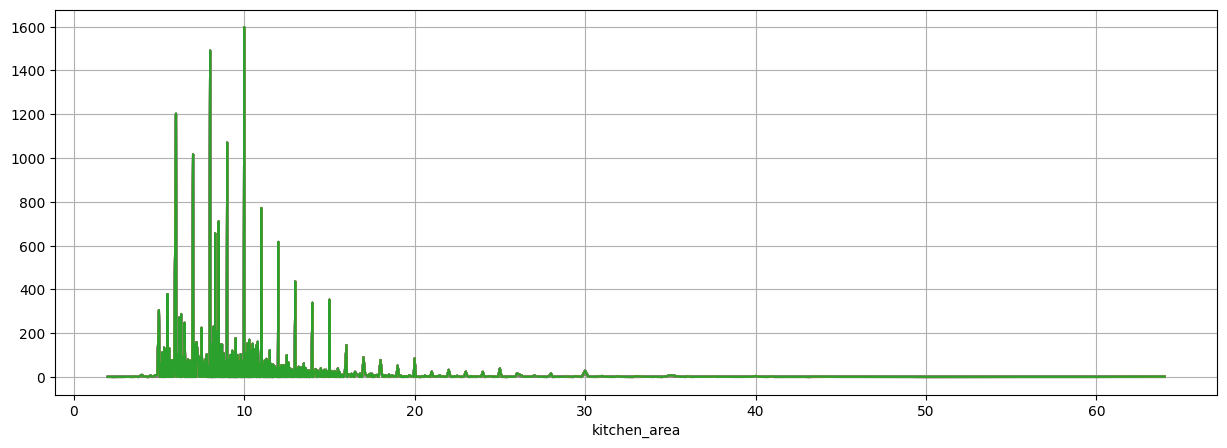

In [262]:
data_normal_prices.pivot_table(index='kitchen_area', aggfunc='count').plot(grid=True, figsize=(15, 5), legend=False);

Наибольшее число объектов имеют кухню, непревышающую 15 кв.м. Видим несколько пиков от 6 кв.м до 10 кв.м. Причина их возникновения -  типовая застройка. Объектов с площадью более 30 кв.м.очень мало. Исключим их из анализа.

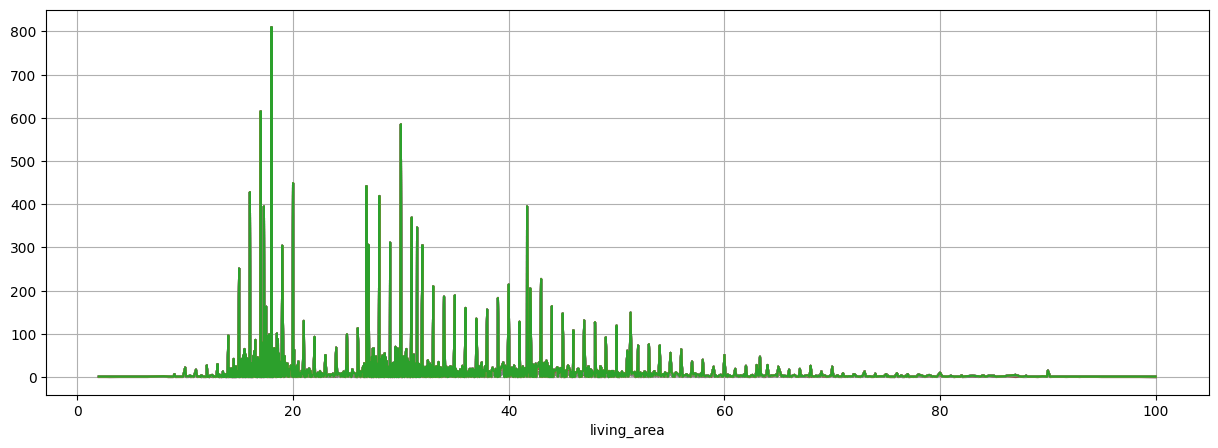

In [263]:
data_normal_prices.pivot_table(index='living_area', aggfunc='count').plot(grid=True, figsize=(15, 5), legend=False);

Аналогично площади кухни, на графике жилой площади встречаются несколько пиковых значений (16 - 19 кв.м, 27 - 32 кв.м., 40 - 43 кв.м). Что также подтверждает теорию типовой застройки. Объектов с жилой площадью более 65 кв.м.очень мало. Исключим их из анализа.

Удалим строки с редкими значениями - `living_area` > 70 и `kitchen_area` > 30.

In [264]:
data_normal_prices = data_normal_prices.query('living_area < 70 and kitchen_area < 30')

##### Аномалии в столбце `ceiling_hight`

Аномальные значения данного столюца были устранены во время обработки пропусков. Построим гистограмму, чтобы увидеть общее число объектов для каждого значения.

In [265]:
data_normal_prices['ceiling_height'].describe()

count    20880.000000
mean         2.672513
std          0.189285
min          2.000000
25%          2.600000
50%          2.600000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

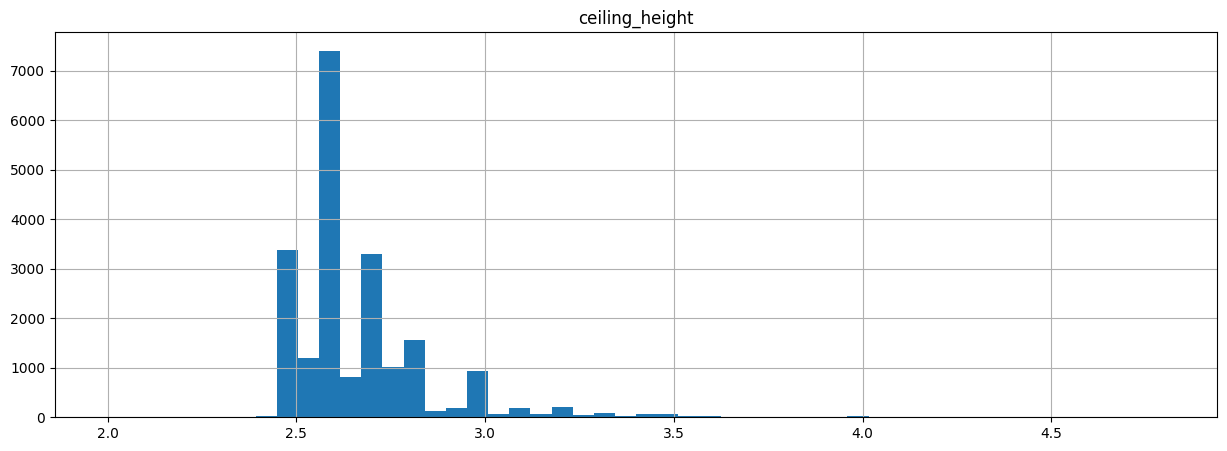

In [266]:
data_normal_prices[['ceiling_height']].hist(bins=50, figsize=(15, 5));

Большинство объектов сосредоточены в диапозоне значений от 2,5 до 2,7 м. Объектов, с высотой потолка более 3,5 метров очень мало.

##### Аномалии в столбцах `cityCenters_nearest`, `parks_nearest` и `ponds_nearest`

Пропущенные значения в данных столбцах не заполнялись в виду отсутствия информации. Проанализируем имеющиеся данные.

In [267]:
data_normal_prices['cityCenters_nearest'].describe()

count    15911.000000
mean     14867.272516
std       8502.444488
min        208.000000
25%      10488.500000
50%      13526.000000
75%      16611.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

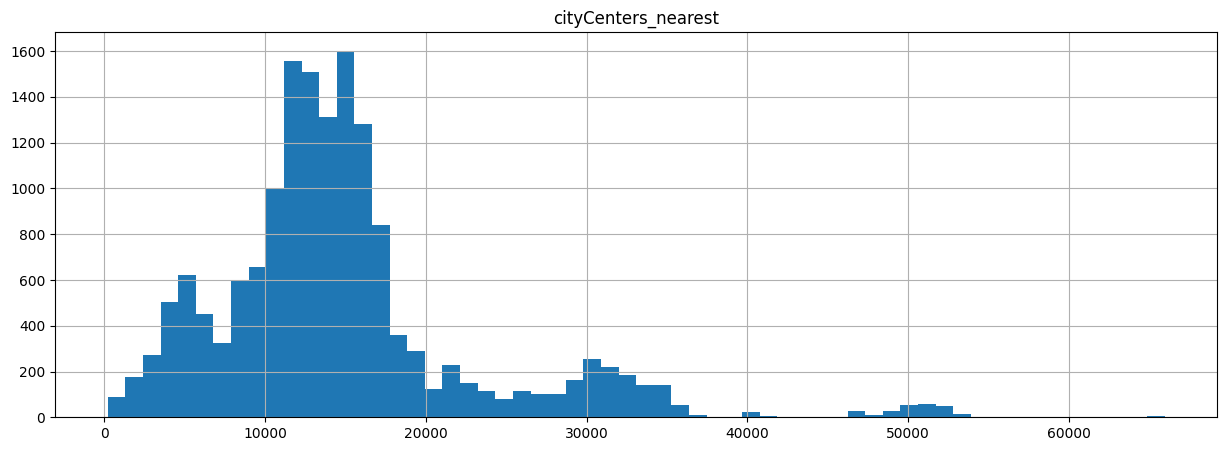

In [268]:
data_normal_prices[['cityCenters_nearest']].hist(bins=60, figsize=(15, 5));

Больше половины объектов расположены в пределах 13 км от центра. Самый отдаленный объект находится в 66 км.

In [269]:
data_normal_prices['parks_nearest'].describe()

count    6732.000000
mean      492.047534
std       335.203142
min         1.000000
25%       290.000000
50%       456.500000
75%       616.000000
max      3190.000000
Name: parks_nearest, dtype: float64

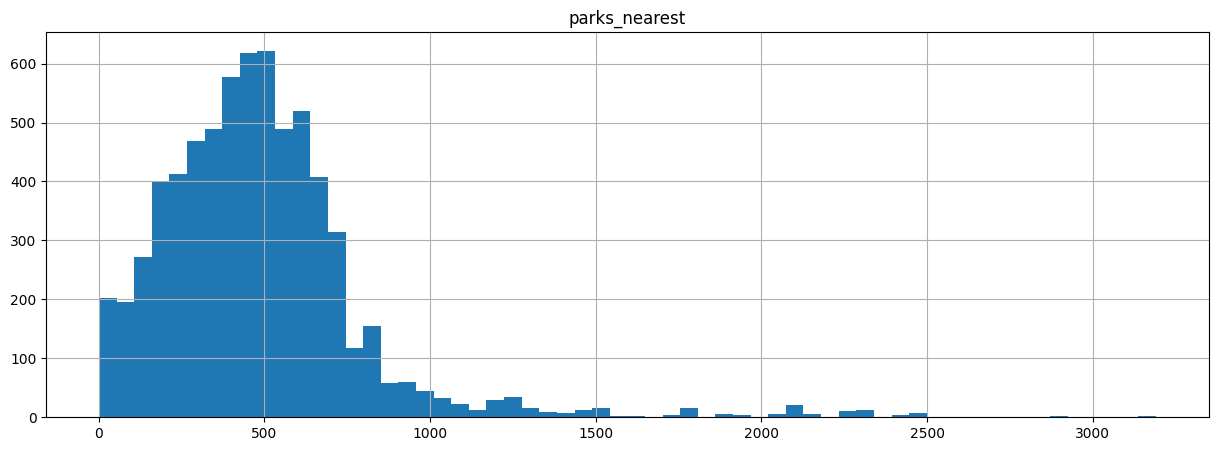

In [270]:
data_normal_prices[['parks_nearest']].hist(bins=60, figsize=(15, 5));

Чаще всего встречаются объекты в шаговой доступности от парка (0,4 - 0,6 км). По мере увелличения расстояния, количество объектов сокращается более, чем в 5 раз.

In [271]:
data_normal_prices['ponds_nearest'].describe()

count    7662.000000
mean      529.048551
std       276.748357
min        13.000000
25%       311.000000
50%       516.000000
75%       738.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

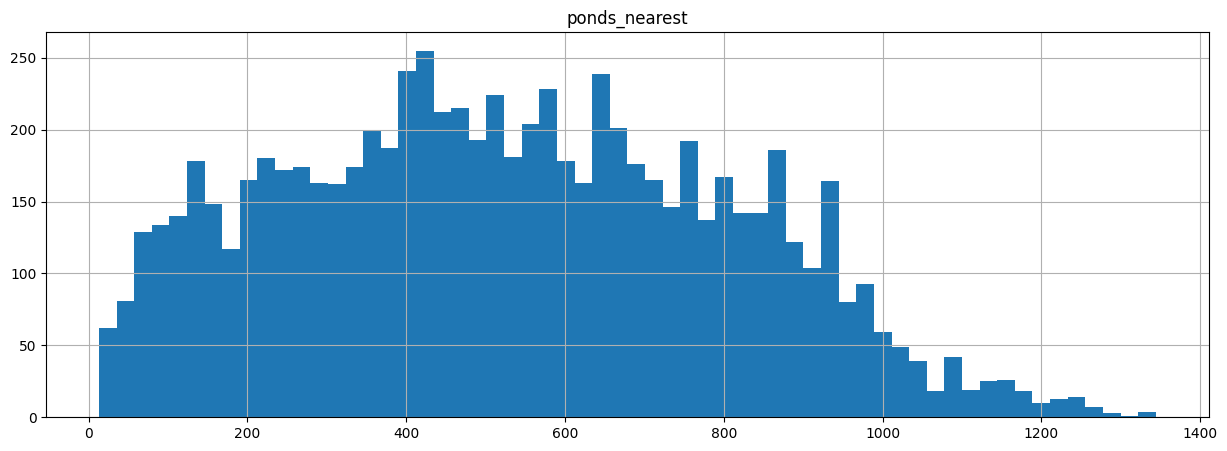

In [272]:
data_normal_prices[['ponds_nearest']].hist(bins=60, figsize=(15, 5));

Максимально известное расстояние от объекта до пруда составляет 1,3 км. При этом 75% данных расположились в диапозоне от 16м до 745 м. Что хорошо коррелирует с данными из солбца `parks_nearest`. Где пруд, там и парк.

##### Аномалии в столбце `first_day_exposition `

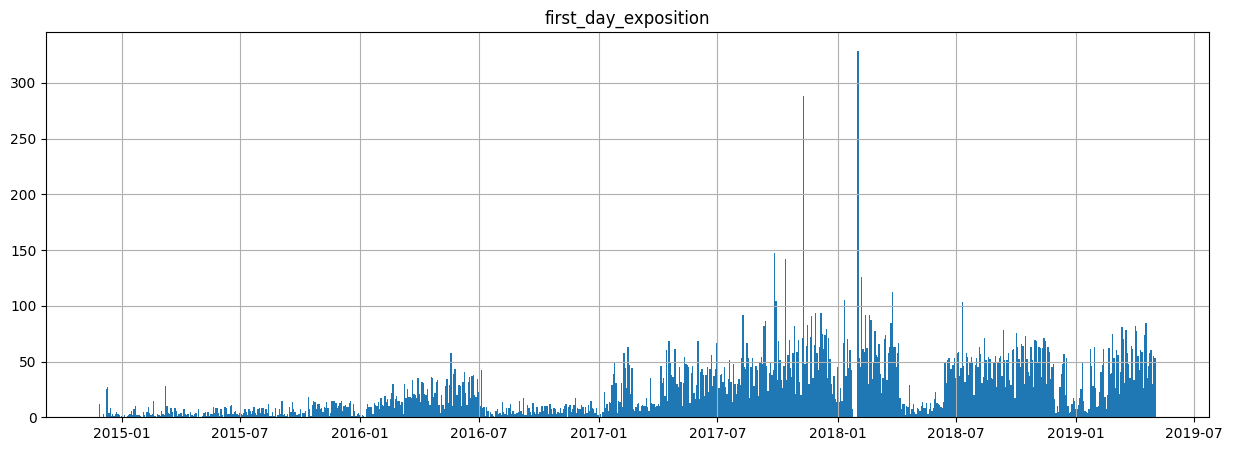

In [273]:
data_normal_prices[['first_day_exposition']].hist(bins=800, figsize=(15, 5));

Сервис был запущен в конце 2010 года и до начала 2017 года количество публикации объявлений в день не превышало 50, за редким исключением. Пиковые значения пришлись на четвертый квартал 2017 и первый квартал 2018 годов. На графике заметны провалы после наступления нового года. За 2019 год есть данные только за 4 месяца. Рассмотрим отдельно три последних года публикаций.

<b>Гистограмма 2017 года</b>

<Axes: >

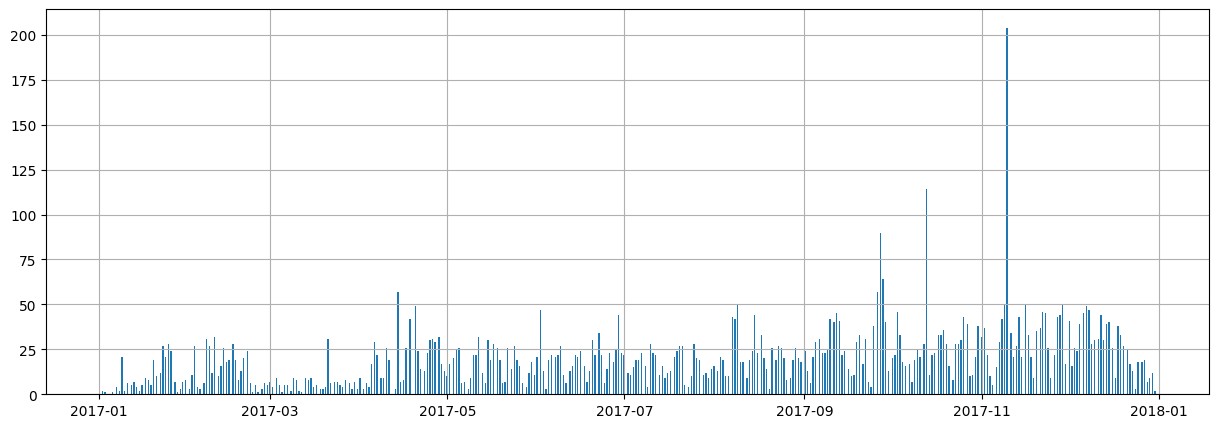

In [274]:
data_normal_prices.query('first_day_exposition >= 2017 and first_day_exposition < 2018')['first_day_exposition'].hist(bins=800, figsize=(15, 5))

Наименьшее число публикаций пришлось на фквраль и март месяц. Также заметен провал в начале февраля. После октября количество публикаций увеличивается, и их пиковое значение приходится на начало ноября, а после начала декабря идет на спад.

<b>Гистограмма 2018 года</b>

<Axes: >

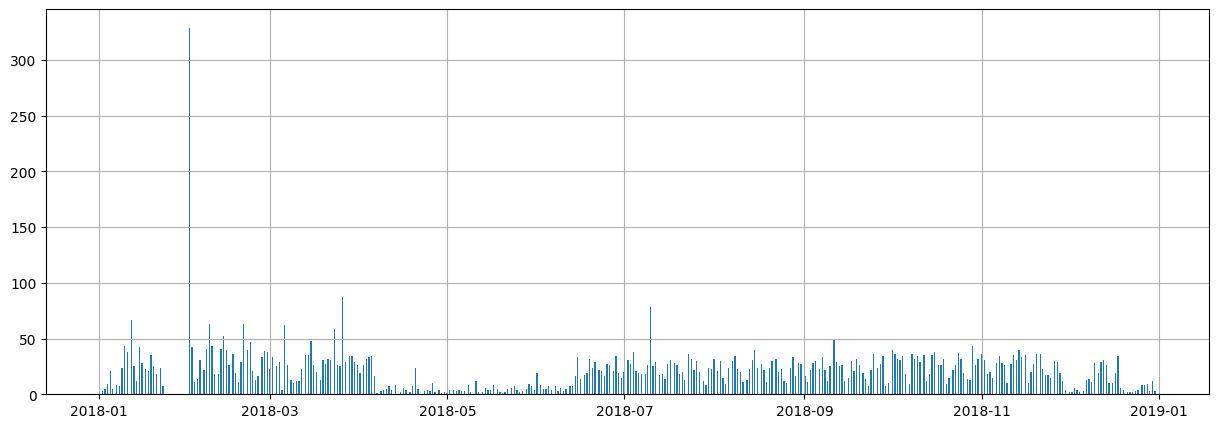

In [275]:
data_normal_prices.query('first_day_exposition >= 2018 and first_day_exposition < 2019')['first_day_exposition'].hist(bins=800, figsize=(15, 5))

С наступлением 2018 года количество объявлений постепенно увеличивается, но сокращается практически до 0 в конце января, начале февраля. Похожая просадка наблюдалась и в 2017 году. Однако после значительной просадки на графике виден пик публикаций в 300 объявлений. Самые низкие значения достигаются в период с апреля по июнь. Также, как и на гистограмме 2017 года наблюдается сокращения числа публикаций в конце года.

<b>Гистограмма 2019 года</b>

<Axes: >

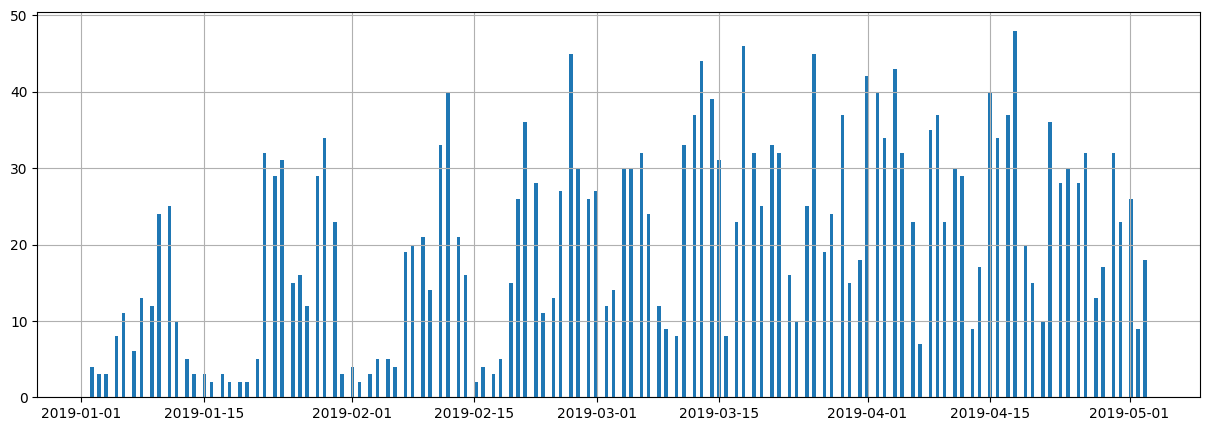

In [276]:
data_normal_prices.query('first_day_exposition > 2019')['first_day_exposition'].hist(bins=300, figsize=(15, 5))

На данном графике более отчеливы видны данные по дням. Просадки в середине января и феврале сохраняются.

##### Аномалии в столбце `airports_nearest `

В таблице характерных значений видно, что минимальное расстояние до аэропорта составляет 0 м. Выведем на экран объекты наиболее близко расположенные к аэропорту.

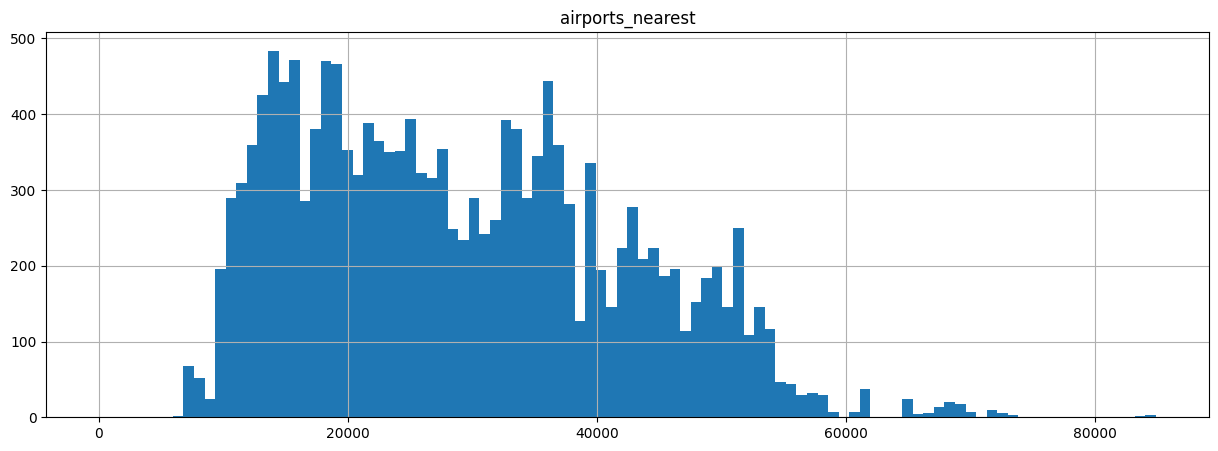

In [277]:
data_normal_prices[['airports_nearest']].hist(bins=100, figsize=(15, 5));

In [278]:
data_normal_prices[['last_price', 'total_area', 'locality_name', 'airports_nearest', 'cityCenters_nearest']].sort_values(by='airports_nearest').head()


,last_price,total_area,locality_name,airports_nearest,cityCenters_nearest
20968,7000000.0,34.7,Санкт-Петербург,0.0,22801.0
3999,2268000.0,35.0,Санкт-Петербург,6450.0,17461.0
12826,4199000.0,56.0,Санкт-Петербург,6450.0,17461.0
23019,6490000.0,62.5,Санкт-Петербург,6949.0,13165.0
10007,5800000.0,47.3,Санкт-Петербург,6989.0,13205.0


В данных только один объект со значением `0` в столбце `airports_nearest`. Удалим данную строку.

In [279]:
data_normal_prices = data_normal_prices.query('airports_nearest != 0')

<b>Выводы:</b>
<br>В результате после устранения выбивающихся значения в столбцах  `last_price`, `total_area`, `rooms`, `floors_total`, `living_area`, `kitchen_area`, `airports_nearest` в датафрейме осталось 19684 строк.

#### Изучение сроков продажи квартиры

Пропущенные значения в столбце `days_exposition` были заменены на значения-маркеры, однако из-за их большого количества гистограмма искажается. Отфильтруем данные с отрицательным значением и построим гистограмму.

In [280]:
data_normal_prices[['days_exposition']].describe()

,days_exposition
count,20879.000000
mean,152.782557
std,207.006464
min,-1.000000
25%,24.000000
50%,73.000000
75%,193.000000
max,1580.000000


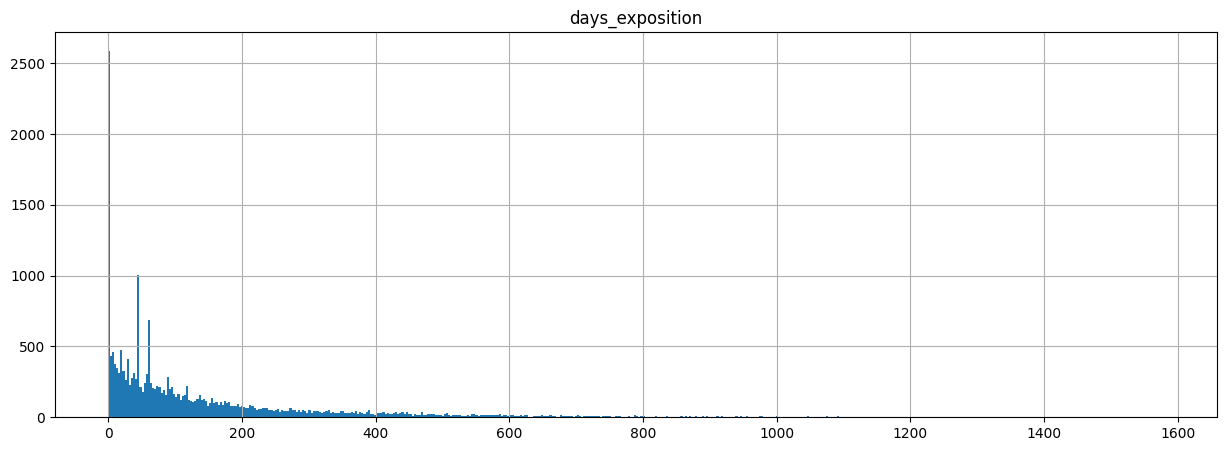

In [281]:
data_normal_prices[['days_exposition']].hist(bins=500, figsize=(15, 5));

Максимальный срок продажи составил 1580 дня (4,3 года), при том, что наименьшее количество дней с момента публикации до продажи - 1 день. Больше половины объектов были проданы примерно за три месяца. Но стоило бы уточнить об особенностях условиях размещения объявлений. Существовали ли какие-либо ограничения или сборы на срок публикации. Более 75% объектов были проданы за 221 день (примерно 7 месяцев).

Выведем количество строк после удаления объектов с аномалиями и рассчитаем их процент.

In [282]:
print(f'Количество удаленных строк - {data_init.shape[0] - data_normal_prices.shape[0]}, что состаляет {((data_init.shape[0] - data_normal_prices.shape[0]) / data_init.shape[0]):.1%}')

Количество удаленных строк - 2820, что состаляет 11.9%


### Добавим в таблицу новые столбцы

Для дополнительного анализа добавим в таблицу дополнительные столбцы:
- цена одного квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры;
- расстояние до центра города в километрах.

#### Цена за квадратный метр

Рассчитаем цену за 1 квадратный метр как отношения цены на момент снятия с публикации к общей площади обхекта и внесем эти значения в новый столбец `price per square meter`.

In [283]:
data_normal_prices['price_per_square_meter'] = data_normal_prices['last_price'] / data['total_area']

#### Дата публикации с разбивкой на день, месяц и год

Добавим к таблиице три столбца с датой, разбитой по дню недели (где 0 — понедельник, 1 — вторник и так далее), месяцу и году публикации.

In [284]:
data_normal_prices['day_of_exposition'] = data_normal_prices['first_day_exposition'].dt.weekday

months={1:'Январь', 2:'Февраль', 3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь',
        7:'Июль', 8:'Август', 9:'Сентябрь', 10:'Октябрь', 11:'Ноябрь', 12:'Декабрь'}

data_normal_prices['month_of_exposition'] = data_normal_prices['first_day_exposition'].dt.month

data_normal_prices['year_of_exposition'] = data_normal_prices['first_day_exposition'].dt.year

#### Тип этажа квартиры

Разделим все значения на три группы: первый, последний и другой и добавим эти значения в новый столбец. Построим гистограмму по получившемуся столбцу.

In [285]:
data_normal_prices['type_floor'] = 'other'

is_first = data_normal_prices['floor'] == 1
data_normal_prices.loc[is_first, 'type_floor'] = 'first'

is_last = data_normal_prices['floor'] == data_normal_prices['floors_total']
data_normal_prices.loc[is_last, 'type_floor'] = 'last'

In [286]:
data_type = data_normal_prices.groupby('type_floor')['last_price'].count()

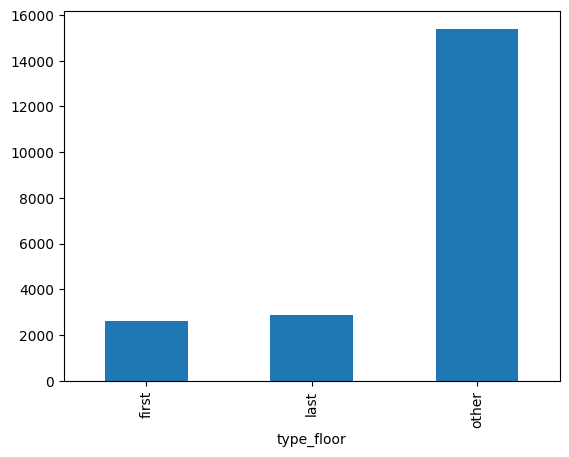

In [287]:
data_type.plot(x='type_floor', y='last_price', kind='bar');

Количество объектов, расположенных на первом и последнем этаже примерно одинаково, ожидаемо, объекты на других этажах составляют большую часть данных.

#### Расстояние до центра города в километрах

Переведем расстояние до центра города в километры, округлив до двух знаков после запятой и запишем значения в столбец `cityCenters_nearest_km`.

In [288]:
data_normal_prices['cityCenters_nearest_km'] = (data_normal_prices['cityCenters_nearest'] / 1000).round(2)

<b>Вывод:</b>
Добавив дополнительные столбцы мы расширили возможности для анализа влияния показателей и выявления неочевидных зависимостей. Исследуем их более детально в следующем разделе.

### Исследовательский анализ данных

#### Анализ зависимости цены от параметров столбцов `total_area`, `living_area`, `kitchen_area`

Построим график зависимости данных параметров от стоимости объекта на момент продажи и рассчитаем коэффициент корреляции.

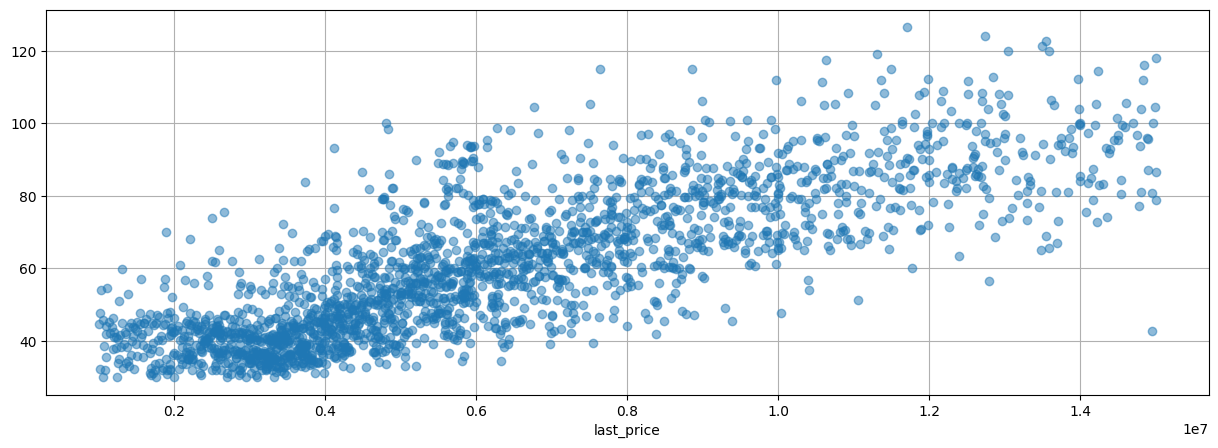

In [289]:
data_normal_prices.pivot_table(index='last_price', values=('total_area')).plot(style='o', grid=True, figsize=(15, 5), legend=False, alpha=0.5);

In [290]:
data_normal_prices['last_price'].corr(data_normal_prices['total_area'])

0.7146920580704093

Существует прямая зависимость цены от общей площади объекта. С уведичением площади увеличивается и цена объекта. Однако на графике можно заметить небольшую "яму" из объектов с площадью в диапозоне 30 - 45 кв.м. и стоимостью от 2 до 4 млн. руб. А также небольшое число выбросов. Предположу, что причиной является наличие в выборке объектов из небольших городов и посёлков, в которых цена будет ниже, чем за квартиру аналогичной площади в Санкт-Петербурге. Чем ближе к правому краю графика, тем больше разница общей площади, при той же цене.

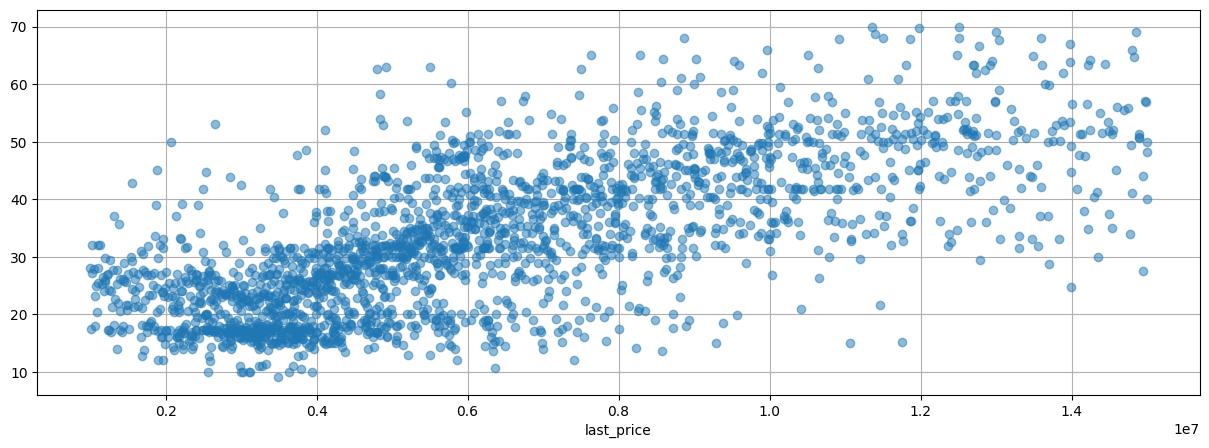

In [291]:
data_normal_prices.pivot_table(index='last_price', values=('living_area')).plot(style='o', grid=True, figsize=(15, 5), legend=False, alpha=0.5);

In [292]:
data_normal_prices['last_price'].corr(data_normal_prices['living_area'])

0.5812425969074859

График зависимости цены от жилой площади похож на предыдущий. Здесь также можно увидеть "просадку" в диапозоне стоимости 2 - 4 млн. руб. Также на грфике заметно разделение диаграммы после 4,2 млн. рублей, при увеличении цены объекта его площадь практически не изменяется.

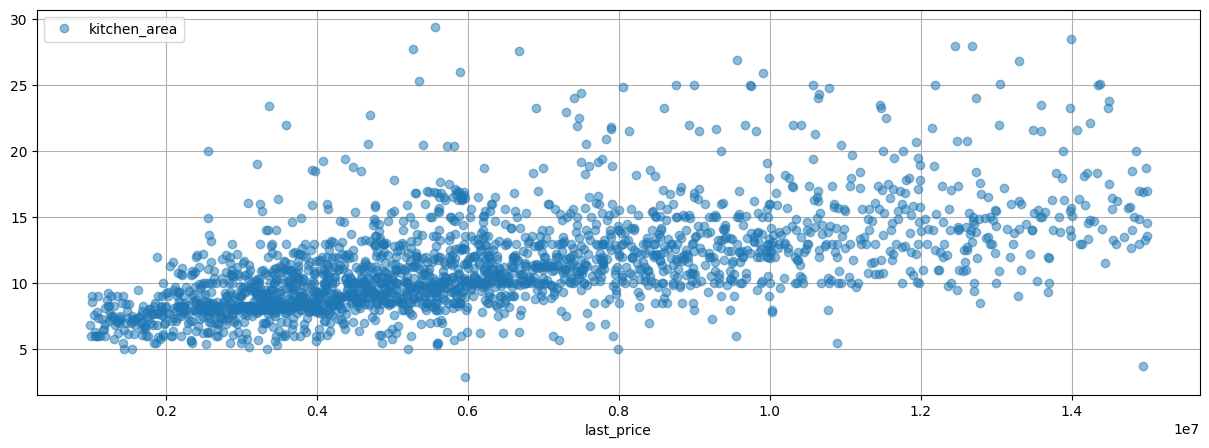

In [293]:
data_normal_prices.pivot_table(index='last_price', values=('kitchen_area')).plot(style='o', grid=True, figsize=(15, 5), alpha=0.5);

In [294]:
data_normal_prices['last_price'].corr(data_normal_prices['kitchen_area'])

0.5177816949121383

Зависимость площади кухни от цены также как и напрошлых графиках - линейная. Но самая слабая из площадных, что полтверждается коэффициентом корреляции.

#### Анализ зависимости цены от параметров столбца `rooms`

После удаления аномалий в столбце остались объекты, с количеством комнат меньше 6.

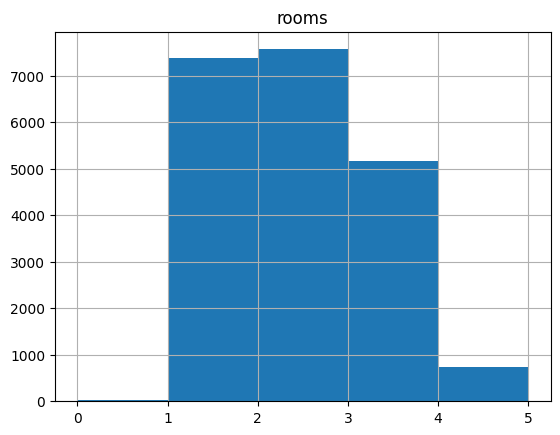

In [295]:
data_normal_prices[['rooms']].hist(bins=5);

Чаще всего встречаюися объявления объектов с одной или двумя комнатами.

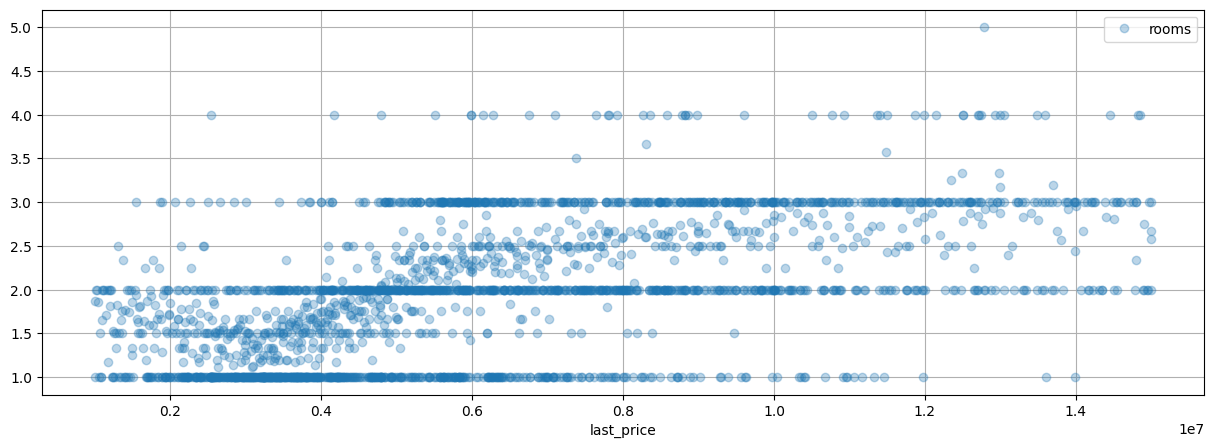

In [296]:
data_normal_prices.pivot_table(index='last_price', values=('rooms')).plot(style='o', grid=True, figsize=(15, 5), alpha=0.3);

In [297]:
data_normal_prices['last_price'].corr(data_normal_prices['rooms'])

0.41837656494079556

Влияние количества комнат на цену объекта не существнно. Заметно, что с увеличением количества комнат плотность объектов смещается вправую часть ценового диапазона. Но нельзя говорить о прямой зависимости. Так как график строится по сводной таблице в зависимости от стоимости, то возникают средние значения комнат для одной цены. При этом, на графике видны однокомнатные объекты с ценой более 8 млн.руб. Стоит отметить, что среднее количество комнат увеличивается с увеличений цены (большое количество 1-, 2х комнатных объектов стоимостью до 5 млн. руб., после чего среднее количество комнат смещается к 2-3).

#### Анализ зависимости цены от параметров столбца  `type_floor`

Рассчитаем медианное значение цены в зависимости от типа этажа и построим гистограмму.

In [298]:
data_type = data_normal_prices.groupby('type_floor')['last_price'].median()

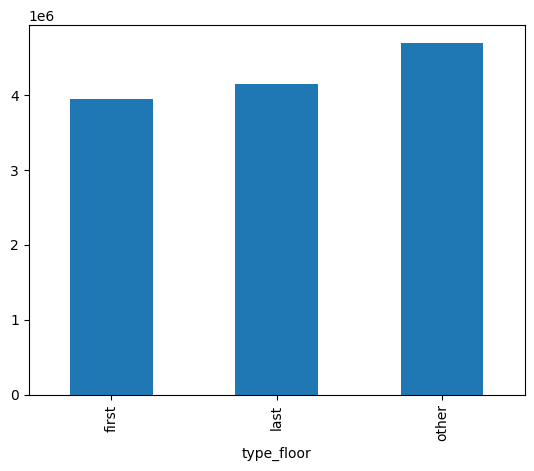

In [299]:
data_type.plot(x='type_floor', y='last_price', kind='bar');

Медианная цена квартиры на последнем этаже значительно ниже, чем цена на других этажах, однако немного выше, квартир, расположенных на первом.

#### Анализ столбцов `day_of_exposition`, `month_of_exposition`, `year_of_exposition`

 Посчитаем количество объявлений, опубликованных за каждый день недели.
 И рассчитаем корреляцию для каждого из параметров.

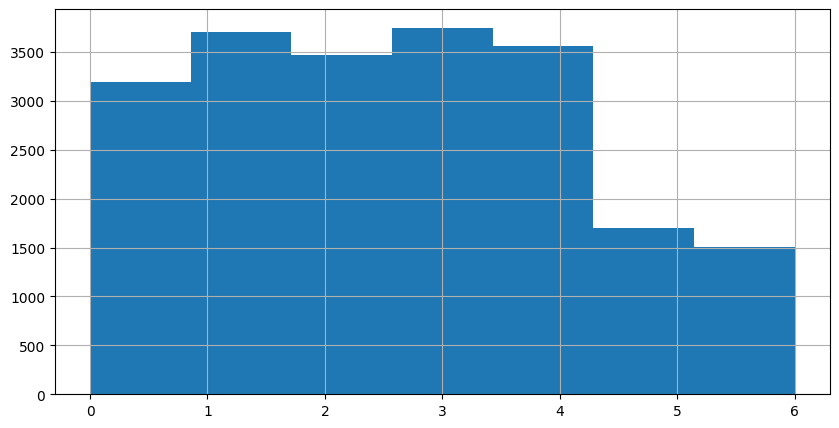

In [300]:
data_normal_prices['day_of_exposition'].hist(bins=7,  figsize=(10, 5));

In [301]:
data_normal_prices['last_price'].corr(data_normal_prices['day_of_exposition'])

-0.010773249176478924

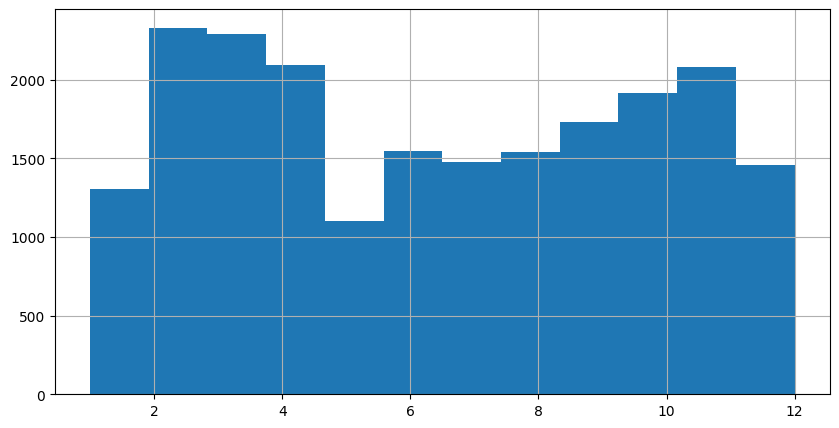

In [302]:
data_normal_prices['month_of_exposition'].hist(bins=12, figsize=(10, 5));

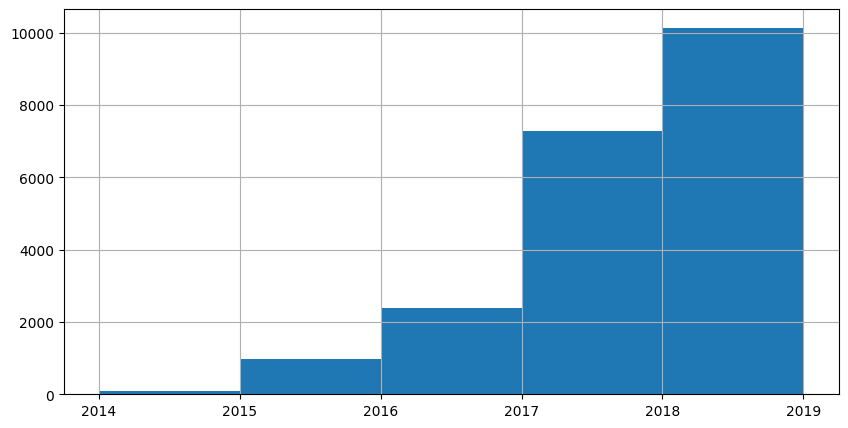

In [303]:
data_normal_prices['year_of_exposition'].hist(bins=5, figsize=(10, 5));

In [304]:
data_normal_prices['last_price'].corr(data_normal_prices['year_of_exposition'])

0.006593760809053511

Значения коэффициента корреляции для всех трех параметров близки к нулю. Но по гистограммам можно увидеть, что наибольшее число объявлений публикуется с февраля по апрель, по будним дням, кроме понедельника.

#### Средняя цена одного квадратного метра

Определим 10 городов с максимальным числом объявлений и сохраним их в переменную `top_10_cities`.

In [305]:
data_normal_prices.groupby('locality_name').count().sort_values(by='last_price', ascending=False)[['last_price']].head(10)

,last_price
locality_name,
Санкт-Петербург,13608
Мурино,507
Кудрово,424
Шушары,419
Всеволожск,382
Пушкин,331
Колпино,329
Парголово,320
Гатчина,300


In [306]:
data_normal_prices['locality_type'] = 'other'

city_name = ['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск', 'Колпино', 'Пушкин', 'Парголово', 'Гатчина', 'Выборг']

fiter_spb = data_normal_prices['locality_name'].isin(city_name)

data_normal_prices.loc[fiter_spb, 'locality_type']  = 'top_10'

In [307]:
top_10_cities = data_normal_prices.query('locality_type == "top_10"').copy()

Рассчитаем цену одного квадратного метра в выбранных городах.

In [308]:
(top_10_cities.groupby('locality_name')
 .agg({'price_per_square_meter': 'mean', 'locality_name': 'count'})
 .rename({'locality_name': 'records_amount'}, axis=1)
 .sort_values('price_per_square_meter', ascending=False))

,price_per_square_meter,records_amount
locality_name,,
Санкт-Петербург,107139.634713,13608
Пушкин,101189.768777,331
Кудрово,94582.915782,424
Парголово,90239.779572,320
Мурино,84696.825560,507
Шушары,77863.596942,419
Колпино,75264.680605,329
Гатчина,69157.306738,300
Всеволожск,67042.055044,382


Самая высокая цена за квадратный метр в Санкт-Петербурге - 104275,5 руб/м2. Чуть ниже в Пушкине - 100098,6 руб/м2, в Кудрово - 94273,0 руб/м2.
<br> Самая низкая цена из городов с максимальным количеством объявлений в Выборге - 58199,3 руб/м2, это почти в два раза дешевле, чем в Санкт-Петербурге.

#### Средняя цена одного километра в Санкт-Петербурге

Рассчитаем средеюю цену каждого километра в Санкт-Петербурге. И построим график её изменения.

In [309]:
data_spb = data_normal_prices[(data_normal_prices['locality_name'] == "Санкт-Петербург")].copy()

In [310]:
data_spb['price_per_km'] = data_spb['last_price'] / data_spb['cityCenters_nearest_km']

<Axes: xlabel='cityCenters_nearest_km'>

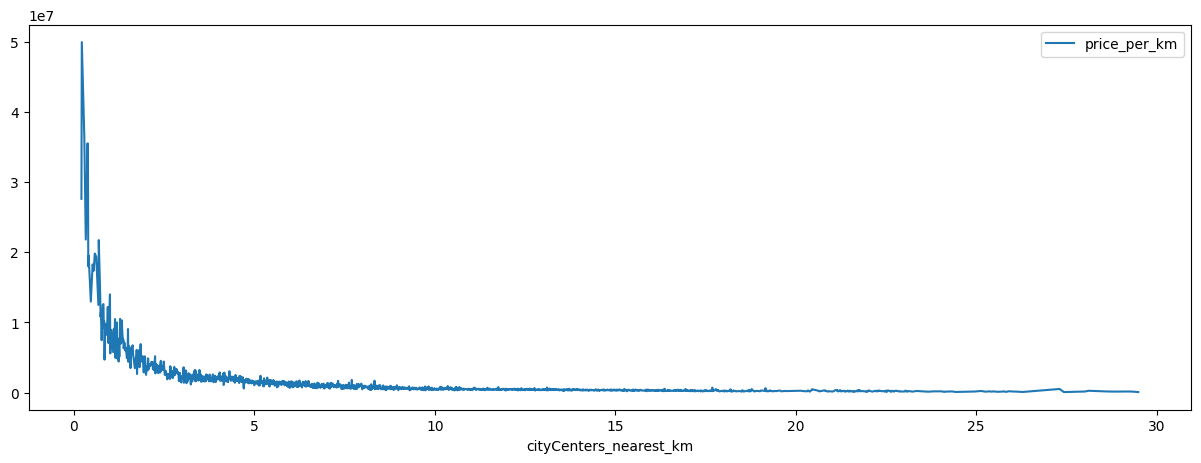

In [311]:
data_spb.query('cityCenters_nearest > 0').pivot_table(index='cityCenters_nearest_km', values='price_per_km', aggfunc='mean').plot(figsize=(15, 5))

In [312]:
data_spb.query('cityCenters_nearest > 0').pivot_table(index='cityCenters_nearest_km', values='price_per_km', aggfunc='mean').describe()

,price_per_km
count,1.861000e+03
mean,1.285195e+06
std,2.775517e+06
min,8.202698e+04
25%,3.323690e+05
50%,4.933955e+05
75%,1.248317e+06
max,4.995455e+07


На графике видно, что средняя цена тем больше, чем ближе объект к центру города. Максимальная цена за километр достигает 4995455 руб/км. Однако после 7 километров разница становится менее заметна и снижается до 82 руб/км на расстоянии 30 км от центра.

### Общий вывод

В данном проекте искали особенности и зависимости на рынке недвижимости Санкт-Петербурга по данным в период с ноября 2014 по май 2019 года.</br>
<br>Сначала были проаналиизированы пропущенные знаечения. В некоторых столбцах пропуски были заменены медианными значениями групп (`ceiling_height`, `living_area`, `total_area`), где это было возможно без искажения данных - восстановлены (`balcony`, `parks_around3000`, `pounds_araund3000`, `is_apartment`). В таких столбцах как `days_exposition`, `cityCentre_nearest`, `airport_nearest`, `parks_nearest` и `pounds_nearest` оставлены без изменения, т.к. восстановить их достоверно без дополнительных данных невозможно.</br>
<br>Устранили дубликаты в столбце с названием населенных пунктов. Выявили и удалили аномалии, выбиваюзиеся из общих данных, чтобы исключить искажения характерных значений параметров и, как следствие, ошибочных выводов.</br>
<br>Рассмотрели как тот или иной параметр влияет на стоимость объекта. Так, более всего цена объекта зависит от его общей площади (как следствие жилой площади, площади кухни и количества комнат). На цене может сказаться и этаж, объекты на первых и последних этажах продаются дешевле, нежеле надругих. Зависимости от дня и месяца публикации объявления не выявлено. Также, в Санкт-Перетбурге существует взаимосвязь между расстоянием до центра города и стоимостью объекта и самая высокая цена за квадратный метр.